## Importing the Dataset from Either Google Drive or Kaggle

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Extracting the Dataset from either Google Drive or Kaggle

In [ ]:
# importing libraries
import zipfile
import os

# Path to your zip file
zip_path = '/content/drive/MyDrive/Plants.zip'
extract_path = '/content/Extract'

# Unzipping the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check if the extraction worked
print(os.listdir(extract_path))

['image data']


## Showing the Number of Images and Classes in the Dataset

In [ ]:
# importing libraries
import os

def count_images_in_directory(directory):
    # Initialize a counter for the images
    total_images = 0

    # Walk through the directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Handle different image formats
                total_images += 1

    return total_images

# Define the path to the cleaned_data directory
Raw_data_data_dir = '/content/Extract/Plants'

# Count the total number of images
total_images = count_images_in_directory(Raw_data_data_dir)

# Print the total number of images
print(f"Total number of images in '{Raw_data_data_dir}': {total_images}")

Total number of images in '/content/Extract/Plants': 53303


## Specifying the Path for Training, Validation and Testing

In [ ]:
# Specifying the Path for Training, Validation and Testing
train_dir = os.path.join(extract_path, 'Plants', 'train')
valid_dir = os.path.join(extract_path, 'Plants', 'valid')
test_dir = os.path.join(extract_path, 'Plants', 'test')

print(f"Folders in train_dir '{os.listdir(train_dir)}'")
print(f"Folders in valid_dir '{os.listdir(valid_dir)}'")
print(f"Folders in test_dir '{os.listdir(test_dir)}'")

Folders in train_dir '['corn (maize)', 'potato', 'apple', 'Rice', 'Cassava', 'peach', 'cherry (including sour)', 'orange', 'pepper, bell', 'tomato', 'strawberry', 'squash', 'grape']'
Folders in valid_dir '['corn (maize)', 'potato', 'apple', 'Rice', 'Cassava', 'peach', 'cherry (including sour)', 'orange', 'pepper, bell', 'tomato', 'strawberry', 'squash', 'grape']'
Folders in test_dir '['corn (maize)', 'potato', 'apple', 'Rice', 'Cassava', 'peach', 'cherry (including sour)', 'orange', 'pepper, bell', 'tomato', 'strawberry', 'squash', 'grape']'


## Importing the Dependencies and Libraries

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Image Preprocessing Code for Quality Enhancement

In [ ]:
# importing libraries
import os
import cv2
import numpy as np

def preprocess_images(input_dir, output_dir, image_size=(224, 224)):
    # Create the output directory
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Walk through the input directory to find images
    for root, dirs, files in os.walk(input_dir):
        print(f"Processing folder: {root}")  # Debugging
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Handle different image formats
                img_path = os.path.join(root, filename)
                image = cv2.imread(img_path)

                # Checking if the image was loaded correctly
                if image is None:
                    print(f"Warning: Unable to load image at {img_path}. Skipping.")
                    continue

                # Step 1: Noise Reduction
                blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

                # Step 2: Color Normalization
                normalized_image = cv2.normalize(blurred_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

                # Step 3: Image Resizing
                resized_image = cv2.resize(normalized_image, image_size)

                # Step 4: Normalization (scale pixel values to [0, 1])
                normalized_image = resized_image / 255.0

                # Create the relative output path
                relative_path = os.path.relpath(root, input_dir)
                output_subdir = os.path.join(output_dir, relative_path)

                if not os.path.exists(output_subdir):
                    os.makedirs(output_subdir)

                output_path = os.path.join(output_subdir, filename)
                cv2.imwrite(output_path, (normalized_image * 255).astype(np.uint8))  # Save image as uint8
                print(f"Processed and saved: {output_path}")

# Define your directories
train_dir = '/content/Extract/Plants/train'
valid_dir = '/content/Extract/Plants/valid'
test_dir  = '/content/Extract/Plants/test'

# Define output directories for Cleaned Dataset
train_output_dir = '/content/Plant_disease_detection/train'
valid_output_dir = '/content/Plant_disease_detection/valid'
test_output_dir  = '/content/Plant_disease_detection/test'

# Preprocess images
preprocess_images(train_dir, train_output_dir)
preprocess_images(valid_dir, valid_output_dir)
preprocess_images(test_dir, test_output_dir)

Streaming output truncated to the last 5000 lines.
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/d197373c-af39-4000-aa28-cab65fafa361___JR_FrgE.S 2959.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/977c9b03-47f2-412d-a73d-7e647e973336___JR_FrgE.S 2887.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/4f0b4e6f-49e8-4e53-8046-14723038601c___JR_FrgE.S 8575.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/26ecaea0-d85f-449b-bd3e-16d85cc49eac___JR_FrgE.S 8674.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/b0fce660-5598-4007-b8d0-7cbd643edb9e___JR_FrgE.S 2851.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/98f61299-9578-49f4-8907-1d06e8b15d8a___JR_FrgE.S 8617.JPG
Processed and saved: /content/Plant_disease_detection/test/apple/black rot/c18a2d5a-4160-48de-8e9e-7ccc047aeddc___JR_FrgE.S 8805.JPG
Processed and save

# Finding Total number of images after Image Preprocessing


In [ ]:
import os

def count_images_in_directory(directory):
    # Initialize a counter for the images
    total_images = 0

    # Walk through the directory
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Handle different image formats
                total_images += 1

    return total_images

# Define the path to the cleaned_data directory
cleaned_data_dir = '/content/Plant_disease_detection'

# Count the total number of images
total_images = count_images_in_directory(cleaned_data_dir)

# Print the total number of images
print(f"Total number of images in '{cleaned_data_dir}': {total_images}")

Total number of images in '/content/Plant_disease_detection': 53303


# Downloading the Zip File in Google Colab

In [ ]:
import shutil
import os

def zip_directory(folder_path, zip_file_path):
    """Zip the folder itself, including its contents."""
    folder_parent = os.path.dirname(folder_path)
    folder_name = os.path.basename(folder_path)

    # Zip the folder while maintaining the directory structure
    shutil.make_archive(zip_file_path, 'zip', folder_parent, folder_name)

# Define the path to the cleaned_data directory
cleaned_data_dir = '/content/Plant_disease_detection'

# Define the path for the zip file
zip_file_path = '/content/Plant_disease_detection'

# Create the zip file
zip_directory(cleaned_data_dir, zip_file_path)

print(f"successfully Zipped '{cleaned_data_dir}' into '{zip_file_path}.zip'")

successfully Zipped '/content/Plant_disease_detection' into '/content/Plant_disease_detection.zip'


### Image Segmentation Process for the Dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


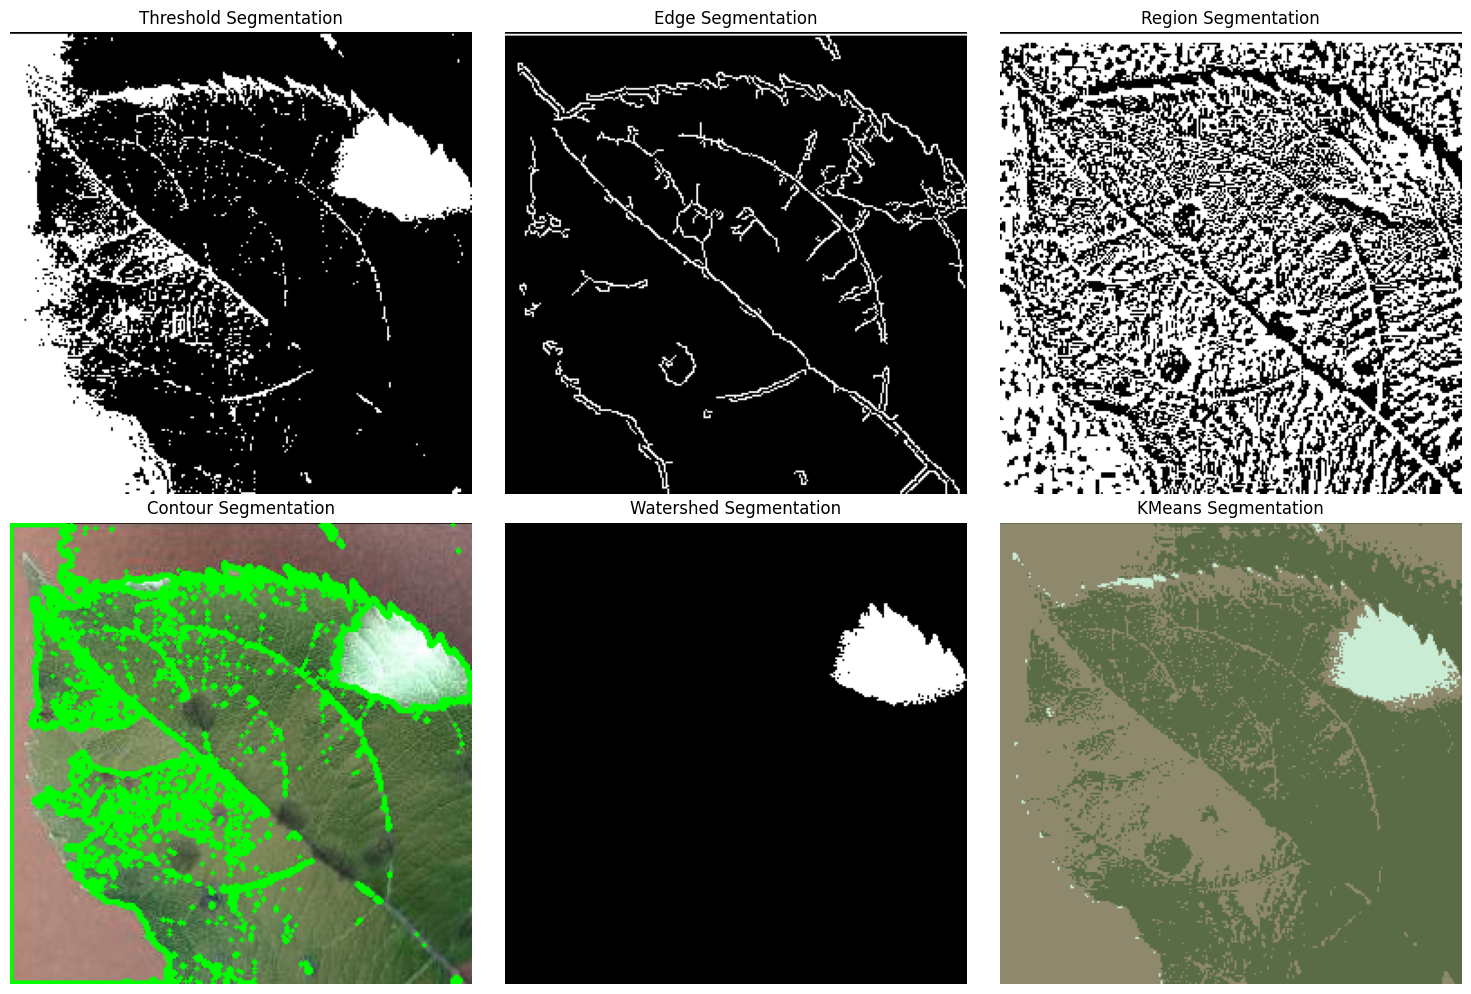

In [ ]:
import cv2
import numpy as np
from skimage import measure
from skimage.segmentation import watershed
from scipy import ndimage as ndi
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Helper function to show multiple images side by side
def display_images(images, titles, rows=2, cols=3):
    plt.figure(figsize=(15, 10))
    for i, (image, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(image if len(image.shape) == 3 else cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray' if len(image.shape) == 2 else None)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Segmentation functions
def threshold_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    return thresh

def edge_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)
    edges = cv2.Canny(blurred, 50, 150)
    return edges

def region_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    return thresh

def contour_based_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contoured_image = image.copy()
    cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
    return contoured_image

def watershed_segmentation(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    distance = ndi.distance_transform_edt(binary)
    local_maxi = measure.label(distance > 0.7 * distance.max())
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=binary)
    return labels

def kmeans_segmentation(image, k=3):
    pixel_values = image.reshape((-1, 3))
    pixel_values = np.float32(pixel_values)
    kmeans = KMeans(n_clusters=k, random_state=42).fit(pixel_values)
    centers = np.uint8(kmeans.cluster_centers_)
    labels = kmeans.labels_.reshape(image.shape[:2])
    segmented_image = centers[labels.flatten()].reshape(image.shape)
    return segmented_image

# Load a sample image from Google Drive
image_path = '/content/drive/MyDrive/sample_image.jpg'
image = cv2.imread(image_path)

# Run each segmentation technique
threshold_seg = threshold_based_segmentation(image)
edge_seg = edge_based_segmentation(image)
region_seg = region_based_segmentation(image)
contour_seg = contour_based_segmentation(image)
watershed_seg = (watershed_segmentation(image).astype(np.uint8) * 255)
kmeans_seg = kmeans_segmentation(image, k=3)

# Display results side by side
titles = ["Threshold Segmentation", "Edge Segmentation", "Region Segmentation",
          "Contour Segmentation", "Watershed Segmentation", "KMeans Segmentation"]
images = [threshold_seg, edge_seg, region_seg, contour_seg, watershed_seg, kmeans_seg]

display_images(images, titles)



### Feature Extraction Part

In [ ]:
from skimage.feature import graycomatrix, graycoprops

# Helper function for GLCM texture features
def extract_glcm_features(gray_image, distances=[1], angles=[0], properties=('contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation')):
    glcm = graycomatrix(gray_image, distances=distances, angles=angles, symmetric=True, normed=True)
    features = {}
    for prop in properties:
        features[prop] = graycoprops(glcm, prop).flatten()
    return features

# Helper function for color histogram features
def extract_color_histogram(image, bins=8):
    hist_features = []
    for i in range(3):  # for each color channel
        hist = cv2.calcHist([image], [i], None, [bins], [0, 256])
        hist = cv2.normalize(hist, hist).flatten()
        hist_features.extend(hist)
    return hist_features

# Helper function for contour-based features (area, perimeter, etc.)
def extract_contour_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contour_features = []
    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        contour_features.append({"area": area, "perimeter": perimeter})
    return contour_features

# Applying feature extraction on each segmented image
features = {}

# Convert the original image to grayscale for GLCM
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# GLCM texture features
glcm_features = extract_glcm_features(gray_image)
features['GLCM'] = glcm_features

# Color histogram features
color_hist_features = extract_color_histogram(image)
features['ColorHistogram'] = color_hist_features

# Contour features
contour_features = extract_contour_features(image)
features['ContourFeatures'] = contour_features

# Display extracted features
print("GLCM Features:", features['GLCM'])
print("Color Histogram Features:", features['ColorHistogram'])
print("Contour Features:", features['ContourFeatures'])


GLCM Features: {'contrast': array([134.78167892]), 'dissimilarity': array([7.09941789]), 'homogeneity': array([0.21448511]), 'ASM': array([0.0005614]), 'energy': array([0.02369387]), 'correlation': array([0.93350497])}
Color Histogram Features: [0.00842252, 0.11754776, 0.5001752, 0.7540453, 0.3031801, 0.27187896, 0.03509894, 0.01684504, 0.006767607, 0.0040289643, 0.23349561, 0.6835283, 0.68818927, 0.040210646, 0.017932842, 0.051612876, 0.009077065, 0.26946372, 0.832854, 0.47309875, 0.0904246, 0.017941177, 0.023957063, 0.027683716]
Contour Features: [{'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 0.0}, {'area': 0.0, 'perimeter': 18.82842707633972}, {'area': 0.0, 'perimeter': 5.656854152679443}, {'area': 0.0, 'perimeter': 0.0}, {'area': 7.0, 'perimeter': 11.656854152679443}, {'area': 0.0, 'perimeter': 2.0}, {'are

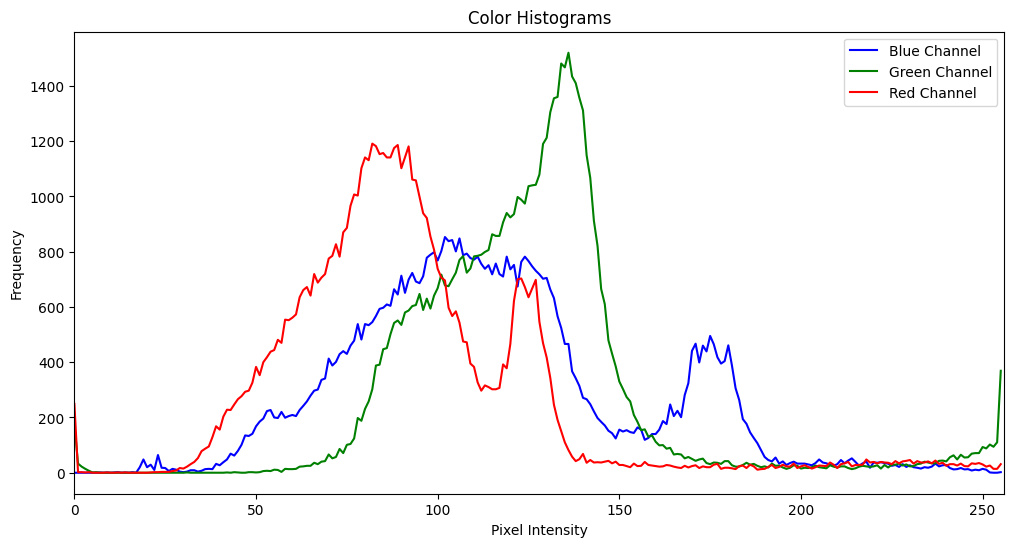

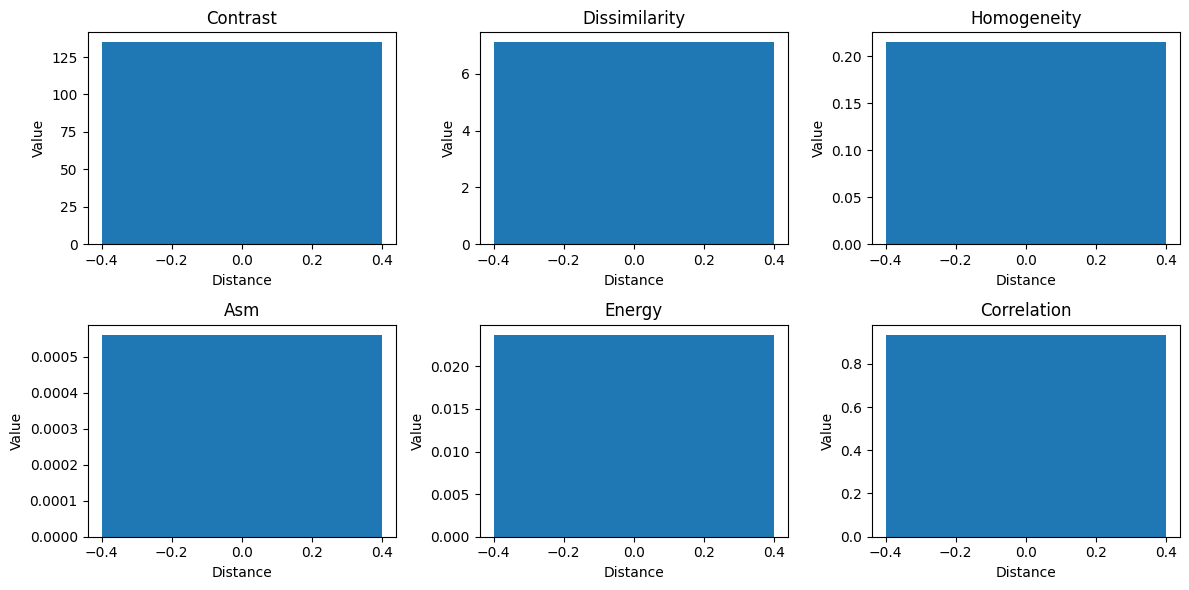

In [ ]:
# Function to plot color histograms
def plot_color_histogram(image):
    colors = ('b', 'g', 'r')  # OpenCV uses BGR format
    plt.figure(figsize=(12, 6))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title('Color Histograms')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.legend(['Blue Channel', 'Green Channel', 'Red Channel'])
    plt.show()

# Function to plot GLCM feature histograms
def plot_glcm_histograms(glcm_features):
    plt.figure(figsize=(12, 6))
    properties = ['contrast', 'dissimilarity', 'homogeneity', 'ASM', 'energy', 'correlation']
    for i, prop in enumerate(properties):
        plt.subplot(2, 3, i + 1)
        plt.bar(range(len(glcm_features[prop])), glcm_features[prop])
        plt.title(prop.capitalize())
        plt.xlabel('Distance')
        plt.ylabel('Value')
    plt.tight_layout()
    plt.show()

# Plot the color histogram of the original image
plot_color_histogram(image)

# Plot GLCM feature histograms
plot_glcm_histograms(features['GLCM'])
